In [1]:
!pip install PyPR

grpcio 1.11.0 requires protobuf>=3.5.0.post1, which is not installed.
You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from skimage import io
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [3]:
def centroid_histogram(clt):    
# grab the number of different clusters and create a histogram
# based on the number of pixels assigned to each cluster    
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels) 
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum() 
    # return the histogram
    return hist

In [5]:
def plot_colors(hist, centroids):
# initialize the bar chart representing the relative frequency
# of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
# loop over the percentage of each cluster and the color of
# each cluster
    for (percent, color) in zip(hist, centroids):
# plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
        color.astype("uint8").tolist(), -1)
        startX = endX
# return the bar chart
    return bar

In [6]:
## K-means clustering of Pathology Images

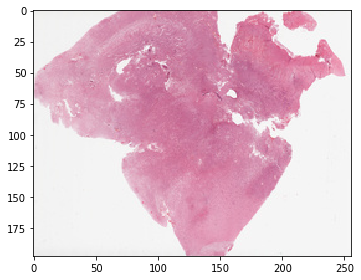

In [7]:
image = io.imread('/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg')
io.imshow(image)
io.show()

In [8]:
image = io.imread('/media/raj/Raj1_5/kmeans/TCGA-02-0001-01Z-00-DX2.b521a862-280c-4251-ab54-5636f20605d0.jpeg')
rows=image.shape[0]
cols=image.shape[1]
image=image.reshape(image.shape[0]*image.shape[1],3)

In [9]:
# kmeans = KMeans(n_clusters = 128, n_init=10, max_iter=200)
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=200,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
kmeans.cluster_centers_

array([[221.64864402, 162.36033878, 187.10197622],
       [243.52078775, 242.76118162, 243.01487965],
       [207.00092885, 126.62833612, 160.81317729]])

In [11]:
numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1)

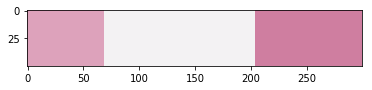

In [12]:
hist = centroid_histogram(kmeans)
bar = plot_colors(hist, kmeans.cluster_centers_)
 
# show our color bart
plt.figure()
plt.imshow(bar)
plt.show()

Text(0,0.5,'$ClusterCentroids$')

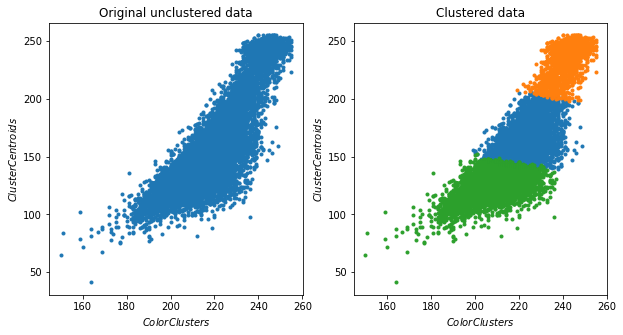

In [13]:
#http://pypr.sourceforge.net/kmeans.html#k-means-example
#https://github.com/mubaris/friendly-fortnight/blob/master/kmeans-from-scratch-and-sklearn.py
from matplotlib.pylab import *
from pypr.clustering.kmeans import *

figure(figsize=(10,5))
subplot(121)
title('Original unclustered data')
plot(image[:,0], image[:,1], '.')
xlabel('$ColorClusters$'); ylabel('$ClusterCentroids$')

subplot(122)
title('Clustered data')
m, cc = kmeans(image, 3, iter=200, cluster_init='sample')
plot(image[m==0, 0], image[m==0, 1], '.')
plot(image[m==1, 0], image[m==1, 1], '.')
plot(image[m==2, 0], image[m==2, 1], '.')
xlabel('$ColorClusters$'); ylabel('$ClusterCentroids$')

In [ ]:
pd.DataFrame(kmeans.labels_)

TypeError: 'KMeans' object does not support indexing

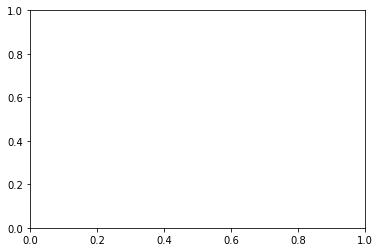

In [16]:
#Plot the clusters obtained using k means
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(c=list(kmeans[0].values()),s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Color')
ax.set_ylabel('Image Data Points')
plt.colorbar(scatter)

In [17]:
import plotly
import plotly.graph_objs as go
kmeans = KMeans(n_clusters = 3, n_init=10, max_iter=200)
kmeans.fit(image)
numLabels = np.arange(0, len(np.unique(kmeans.labels_)) + 1) # No. of clusters
img_pts=kmeans.labels_ 
cluster_coordinates = kmeans.cluster_centers_
sqrd_distances=kmeans.inertia_

plotly.offline.plot({
    "data": [go.Scatter(x=[numLabels], y=[img_pts], mode='markers')],
    "layout": go.Layout(title="Pathology Image Scatter Plot")}, auto_open=True)

'temp-plot.html'

In [ ]:
import plotly
plotly.tools.set_credentials_file(username='sraja2911', api_key='IoeFycToNYSPKNijoAPs')

In [ ]:
y0 = kmeans
y1 = labels

trace0 = go.Box(
    y=y0
)
trace1 = go.Box(
    y=y1
)
data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='color intensity',
        zeroline=False
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(data)

In [ ]:
y0 = clusters
y1 = labels

data = [go.Histogram(x=y1)]

layout = go.Layout(
    yaxis=dict(
        title='color intensity',
        zeroline=True
    ),
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(data)